## light example
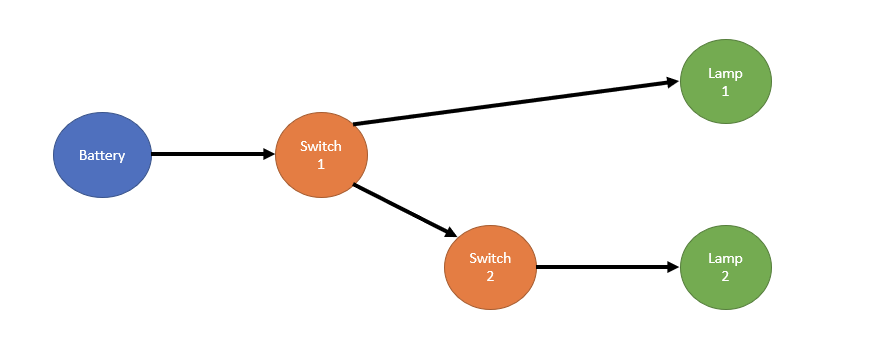


#### Possible causes and their prior probabilities:
- Battery is flat (0.2)
- Switch 1 is in wrong position (0.5)
- Switch 2 is in wrong position (0.5)
- Lamp 1 is broken (0.1)
- Lamp 2 is broken (0.1) 

assumption: lamp states are on or off or broken

#### Possible actions and their costs:
- Measure battery (3)
- Replace battery (5)
- Toggle switch 1 (2)
- Toggle switch 2 (2)
- Observe lamp 1 (1)
- Observe lamp 2 (1)
- Replace lamp 1 (6)
- Replace lamp 2 (6

#### Scenario:
- I need lamp 2 to be on but is not.

#### Question:
- What is the best series of actions I should take?


### hoe het beste te modelleren?
#### Joep 
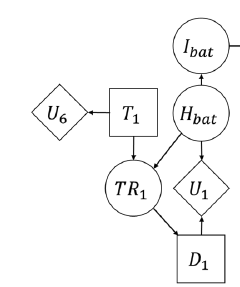
- health heeft invloed op normale werking
- een testbesluit heeft eigen U en een testresultaat TR
- health kijkt naar testresultaat
- een vervangingsbesluit D1 en Health zijn input voor een vervangingsutility
  - voor D1 is een vaste utility functie



In [1]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [2]:
# create influence diagram
diag = gum.InfluenceDiagram()

## Structure

### chancevariables & decisions

In [3]:
# variables & decisions
# L1: lamp 1 is on or off
# L1Health: health of lamp 1, ok or broken
# T1: decision to test the lamp, yes/no, costs 1
# TR1: result of testing the lamp
# D1: vervangen lamp

L1 = diag.addChanceNode(gum.LabelizedVariable('L1', 'L1', ["on", "off"]))
L1Health = diag.addChanceNode(gum.LabelizedVariable('L1Health', 'L1 Broken', ["ok", "broken"]))
T1 = diag.addDecisionNode(gum.LabelizedVariable('T1', 'T1', ["yes", "no"]))
TR1 = diag.addChanceNode(gum.LabelizedVariable('TR1', 'TR1', ["not done", "OK", "broken"]))
D1 = diag.addDecisionNode(gum.LabelizedVariable('D1', 'D1', ["yes","no"]))

diag.addArc(L1Health, L1)
diag.addArc(L1Health, TR1)
diag.addArc(T1, TR1)
diag.addArc(TR1, D1)

## utility

In [4]:
UT=diag.addUtilityNode(gum.LabelizedVariable("UT", "R(T1)", 1))
UR=diag.addUtilityNode(gum.LabelizedVariable("UR", "R(D1)", 1))

diag.addArc(T1, UT)
diag.addArc(D1, UR)
diag.addArc(L1Health, UR)


Influence Diagram{
  chance: 3,
  utility: 2,
  decision: 2,
  arcs: 7,
  domainSize: 48
}


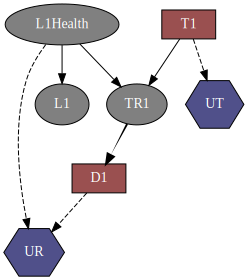

In [5]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)


### chancevariables cpt's

In [10]:
# L1, normal behavior is "on"
diag.cpt(L1)[{"S1": 1, "L1Health":0}] = [0.0, 1.0]
diag.cpt(L1)[{"S1": 1, "L1Health":1}] = [0.01, 0.99]

# L1Health, there is a small chance light is broken
diag.cpt(L1Health)[0] = 0.7
diag.cpt(L1Health)[1] = 0.3

# TR1, test result
diag.cpt(TR1)[{"T1":0, "L1Health":0}] = [0.5, 0.2, 0.3]
diag.cpt(TR1)[{"T1":0, "L1Health":1}] = [0.5, 0.2, 0.3]
diag.cpt(TR1)[{"T1":1, "L1Health":0}] = [0.5, 0.2, 0.3]
diag.cpt(TR1)[{"T1":1, "L1Health":1}] = [0.5, 0.2, 0.3]



In [11]:
gnb.flow.row(diag.cpt(L1),
            diag.cpt(L1Health),
            diag.cpt(TR1),

            captions=[  "prior of L1",
                        "prior of L1Health",
                        "prior of TR1",
                      ])

In [15]:
diag.utility("UT")[{"T1":0}] = -20
diag.utility("UT")[{"T1":0}] = -20

diag.utility("UR")[{"L1Health":0, "D1": 0}] = 10
diag.utility("UR")[{"L1Health":0, "D1": 1}] = 10
diag.utility("UR")[{"L1Health":1, "D1": 0}] = 10
diag.utility("UR")[{"L1Health":1, "D1": 1}] = 10


In [16]:
gnb.flow.row(diag.utility(UT),
            diag.utility(UR),
            captions=[  "utility of UT",
                        "utility of UR"
                      ])

# inference

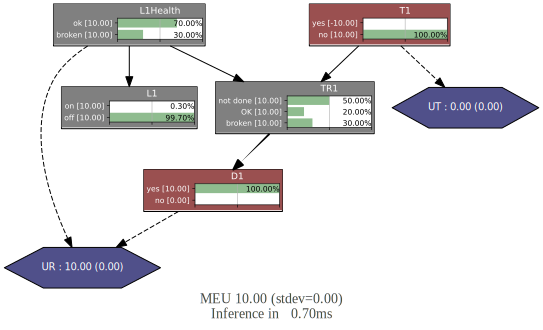

In [17]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={}, size=15)

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1}, size=15)

- GIVEN lamp brandt niet S1 on
- WHEN evidence L1: off en L1Observe: broken
- THEN decision L1Observe is positief

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1, "S1": 0}, size=15)

- GIVEN lamp brandt niet en check laat zien dat lamp stuk is
- WHEN evidence L1: off en L1Observe: broken
- THEN decision L1Observe is positief

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1, "L1ObserveResult":2}, size=15)

In [ ]:
ie.optimalDecision("L1Observe")






GIVEN check van de lamp 


In [ ]:
# set evidence
ie.setEvidence({'L1':"broken", "L1Observe": "yes"}) # light is on

In [ ]:
# perform inference
try:
    ie.makeInference()
except gum.GumException as e:
    print(e)
    
diagvars = diag.names()

In [ ]:
# results: posteriors of variables
for i in diagvars:
    if diag.isChanceNode(i):
        print(ie.posterior(i))

In [ ]:
# results: posteriors of decisions
for i in diagvars:
    if diag.isDecisionNode(i):
        print(ie.optimalDecision(i))

In [ ]:
# results: posterior of utility
for i in diagvars:
    if diag.isUtilityNode(i):
        print(ie.posteriorUtility(i))

In [ ]:
ie.MEU()

In [ ]:
ie.junctionTree()

In [ ]:
ie.reducedGraph()

# niet meer nodig

In [ ]:
# define utility for benefits UB
UB=diag.addUtilityNode(gum.LabelizedVariable("UB", "UB", 1))

# add arcs from variables to UB
diag.addArc(S1, UB)
diag.addArc(L1, UB)

diag.utility(UB)[{"S1":"pos on", "L1": "on"}] = 100
diag.utility(UB)[{"S1":"pos on", "L1": "off"}] = 0
diag.utility(UB)[{"S1":"pos on", "L1": "broken"}] = 0
diag.utility(UB)[{"S1":"pos off", "L1": "on"}] = 0
diag.utility(UB)[{"S1":"pos off", "L1": "off"}] = 50
diag.utility(UB)[{"S1":"pos off", "L1": "broken"}] = 0



In [ ]:
# define utility for costs UT
UT=diag.addUtilityNode(gum.LabelizedVariable("UT", "UT", 1))

# add arc from decisions to U
diag.addArc(L1Test, UT)



In [ ]:
# total order of decisions => proper influence diagram
#ie.addNoForgettingAssumption(["L1Observe", "S1Toggle", "L1Replace"])

In [ ]:
vars = ['L1Test', 'UT', 'L1Health', 'L1', 'L1TestResult']
costs = [0, 5, 6, 6, 9]
print(vars)
if len(vars) != len(costs):
    print("probleem: lengte vars en costs niet gelijk")

In [ ]:
pot = diag.utility('UT')  # get all permutations via potential object


for i in pot.loopIn():  # go through potential
    u = 0   # initialize u
    d = i.todict()   # transform to dict
    for v in range(len(vars)):   # check values exist and if so add costs
        if vars[v] in d:
            if d[vars[v]] == 'yes':    # all decisions are yes/no
                u = u + costs[v]
    del d['UT']
    diag.utility(UT)[d] = u  # add utility to state
    print(str(d) + "   :" + str(u)) 
               
